In [6]:
# 导入数据集
import pandas as pd
from sklearn import datasets
beer = pd.read_excel('data.xlsx')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [7]:
# 二、读取数据
X = beer[['calories', 'sodium', 'alcohol', 'cost']]

In [13]:
# 三、使用k-means 对x进行聚类
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)
km2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [14]:
# 四、 根据聚类进行排序
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
8,Miller_Lite,99,10,4.3,0.43,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0
4,Heineken,152,11,5.0,0.77,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
2,Lowenbrau,157,15,0.9,0.48,1,1
10,Coors,140,18,4.6,0.44,1,1


In [23]:
# 五 计算cluster =3  的平均值
from pandas.tools.plotting import scatter_matrix
cluster_centers = km.cluster_centers_
cluster2_centers = km2.cluster_centers_
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,102.75,10.0,4.075000,0.440000,0
1,150.00,17.0,4.521429,0.520714,1
2,70.00,10.5,2.600000,0.420000,0


In [20]:
# 六，计算cluster =2  的平均值
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,0.666667
1,150.000000,17.000000,4.521429,0.520714,1.000000


In [29]:
# 七、利用reset_index 重置索引
centers = beer.groupby('cluster').mean().reset_index()
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,102.75,10.0,4.075000,0.440000,0
1,1,150.00,17.0,4.521429,0.520714,1
2,2,70.00,10.5,2.600000,0.420000,0


Text(0, 0.5, 'alcohol')

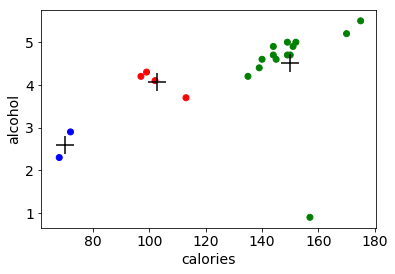

In [45]:
# 八 可视化效果
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])
plt.scatter(beer['calories'], beer['alcohol'], c = colors[beer['cluster']])
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('calories')
plt.ylabel('alcohol')
# Text(0, 0.5, 'alcohol')

In [47]:
# 九 ，计算不同cluster每个聚类的不同特征的centers值
from pandas.tools.plotting import scatter_matrix
cluster_centers = km.cluster_centers_
cluster2_centers = km2.cluster_centers_
print(cluster2_centers)
print(cluster_centers)

[[ 91.83333333  10.16666667   3.58333333   0.43333333]
 [150.          17.           4.52142857   0.52071429]]
[[102.75        10.           4.075        0.44      ]
 [150.          17.           4.52142857   0.52071429]
 [ 70.          10.5          2.6          0.42      ]]


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Text(0.5, 0.98, 'With 3 centroids initialized')

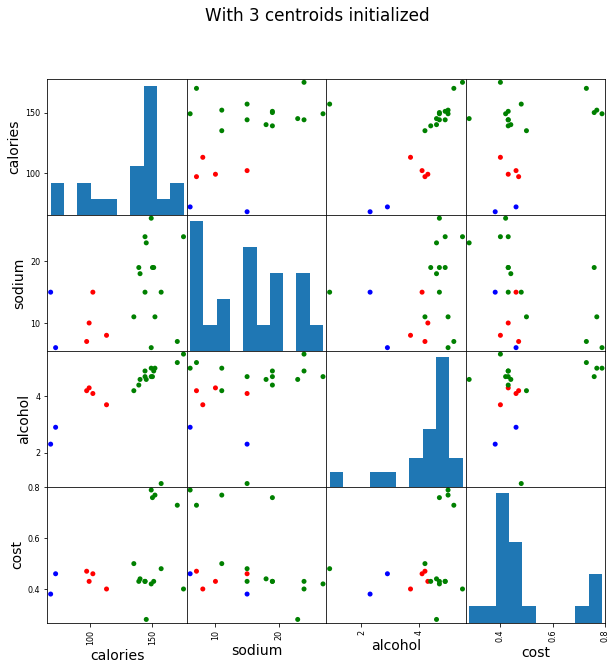

In [33]:
# 十、基于第九步，cluster=3 进行可视化,散布矩阵
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0.98, 'With 2 centroids initialized')

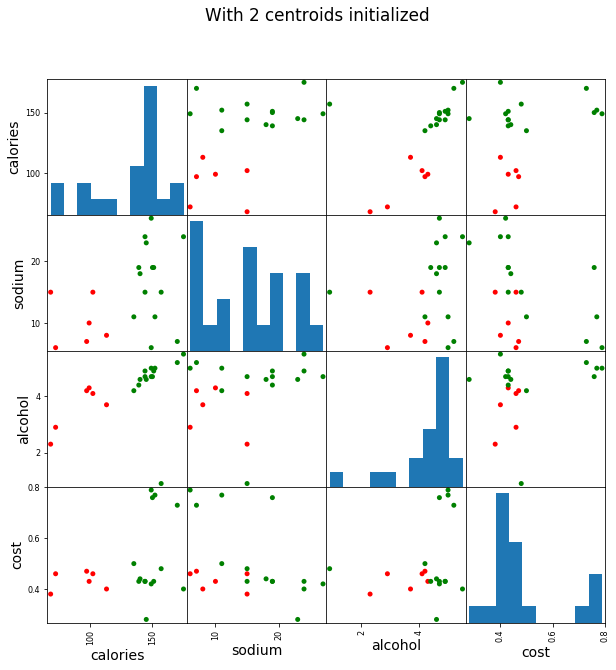

In [34]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100, alpha=1, c=colors[beer['cluster2']], figsize=(10,10))
plt.suptitle('With 2 centroids initialized')


In [36]:
# 十一、使用DBSCAN进行聚类
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 10,min_samples=2).fit(X) ##半径为10，密度为2

In [38]:
labels =db.labels_
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,0,0,-1
3,Kronenbourg,170,7,5.2,0.73,1,1,-1
6,Augsberger,175,24,5.5,0.40,1,1,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1,0
16,Hamms,139,19,4.4,0.43,1,1,0
14,Kirin,149,6,5.0,0.79,1,1,0
13,Becks,150,19,4.7,0.76,1,1,0
12,Michelob_Light,135,11,4.2,0.50,1,1,0
10,Coors,140,18,4.6,0.44,1,1,0
0,Budweiser,144,15,4.7,0.43,1,1,0


In [39]:
# 十二、求每个特征的均值
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2
cluster_db,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.666667,0.666667
0,146.250000,17.250000,4.383333,0.513333,1.000000,1.000000
1,99.333333,10.666667,4.200000,0.453333,0.000000,0.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,0.000000


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013ED4BA8>,
      dtype=object)

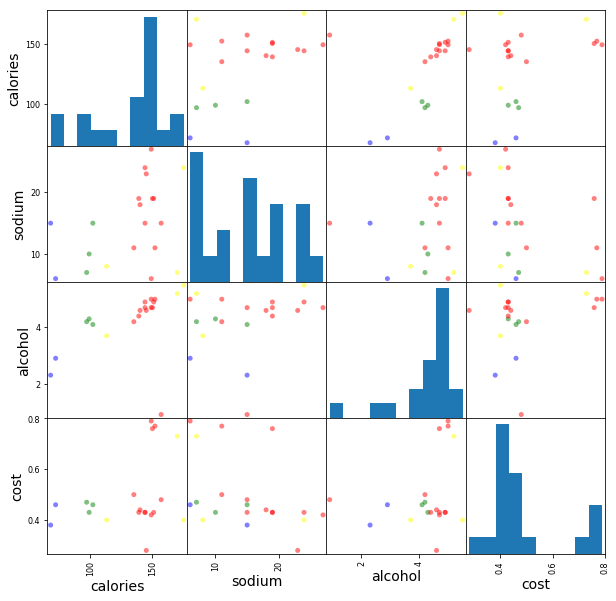

In [40]:
# 十三、可视化效果
pd.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)